<h2>Multiple Linear Regression</h1>

y = b0 + b1 * x1 + b2 * x2 + b3 * x3 

<h2>Import Libraries</h2>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d

<h2>Import CSV</h2>

In [3]:
df=pd.read_csv('data/Salary_multiple.csv')

In [4]:
df.head()

,YearsExperience,Field,Salary
0,1.1,Technical,39343.0
1,1.3,Non-Technical,26205.0
2,1.5,Technical,37731.0
3,2.0,Non-Technical,28525.0
4,2.2,Technical,39891.0


<h2>Simple Encoding</h2>

In [5]:
df.loc[:,'Field'].replace(['Technical','Non-Technical'],[0,1],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1772\2156117559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[:,'Field'].replace(['Technical','Non-Technical'],[0,1],inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1772\2156117559.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df

In [6]:
print(df.head())

   YearsExperience  Field   Salary
0              1.1      0  39343.0
1              1.3      1  26205.0
2              1.5      0  37731.0
3              2.0      1  28525.0
4              2.2      0  39891.0


<h2>Splitting x and y</h2>

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,2].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

print(x_train.shape)
print(x_test.shape)

(24, 2)
(6, 2)


<h2>Multiple Regression</h2>

In [10]:
regression = LinearRegression()

In [11]:
model = regression.fit(x_train, y_train)

In [12]:
y_pred = model.predict(x_test)
print(y_pred)

print(y_test)

[47603.7887057  57194.93227484 55510.78640533 86339.14370452
 23183.67359776 63931.5157529 ]
[47938. 64445. 60150. 76969. 28525. 55794.]


<h2>Evaluate</h2>

In [17]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('R^2: ', r_square)

Mean Squared Error:  42791000.89880929
Mean Absolute Error:  5845.4130789636865
R^2:  0.8094454232000521


C:\Users\user\AppData\Local\Temp\ipykernel_1772\2836584626.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


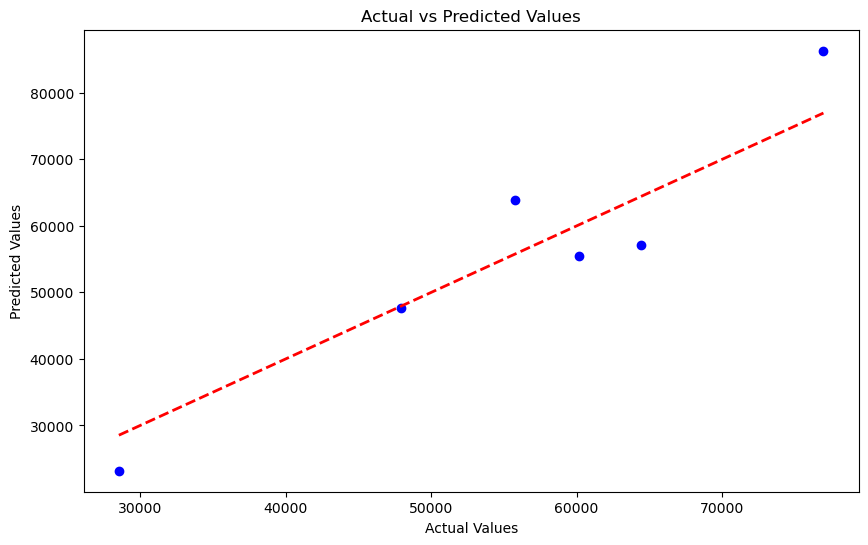

In [18]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()